# Predict DNA Sequence with Keras

### Load Python libraries

In [7]:
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix

from sklearn.preprocessing import MinMaxScaler

import numpy as np

import matplotlib.pyplot as plt
from keras.models import Sequential

from PIL import Image

### Read the toy DNA sequence dataset

In [8]:
#Prepare colums for one hot encoding
tmp = pd.read_csv("./prom_sites_seq.txt", "\t")
#tmp = pd.read_csv("./prom_sites_seq_small.txt", "\t")
dna_seq = tmp['dna']

dna_len = len(dna_seq[0])

In [9]:
tmp[-5:]

,mut,dna
101500,0,GGTAGGCCCAGGCGCCGGGAG
101501,0,CGCAAAGGTGATGAAATGGCA
101502,1,TCAGCACCACGCACTCTGACT
101503,1,GTGATCTGCCCGCCTCGGCCT
101504,1,AGCACTAGAAGGGAATACCCA


In [10]:
dna_label = np.ndarray(shape=(len(dna_seq),2))
dna_label.shape


(101505, 2)

In [11]:
for i in range(len(tmp['mut'])):
    if tmp['mut'][i] == 0:
        dna_label[i][0] = 1
    elif tmp['mut'][i] == 1:
        dna_label[i][1] = 1

In [12]:
dna_enc = np.zeros(shape=(len(dna_seq),dna_len*4))
dna_enc[1]
dna_enc.shape

(101505, 84)

In [13]:
# One Hot Encoding
for i in range(len(dna_seq)):
    for j in range(dna_len):
        if dna_seq[i][j] == 'A':
            dna_enc[i][(dna_len * 0) + j] = 1
        elif dna_seq[i][j] == 'C':
            dna_enc[i][(dna_len * 1) + j] = 1
        elif dna_seq[i][j] == 'G':
            dna_enc[i][(dna_len * 2) + j] = 1
        elif dna_seq[i][j] == 'T':
            dna_enc[i][(dna_len * 3) + j] = 1
    #print(dna_seq[i])
    #print(tmp[i].reshape(4,21))
    dna_enc[i].reshape(4, dna_len)

In [15]:
dna_enc.shape

(101505, 84)

AAAACGTATACCACTATGATG
[[ 1.  1.  1.  1.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.
   1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
   0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.
   0.  1.  0.]]


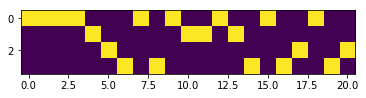

In [14]:
# Example
# Show hot encoded sample with image
%matplotlib　inline

sample_index = 10000

print(dna_seq[sample_index])
print(dna_enc[sample_index].reshape(4, dna_len))

plt.imshow(dna_enc[sample_index].reshape(4, dna_len))
#pil_img = Image.fromarray(np.uint8(dna_enc[sample_index].reshape(4, dna_len) * 1000))
#pil_img.show()

## Training by Neural Network

In [16]:
dna_label

array([[  1.00000000e+000,   6.92735271e-310],
       [  1.00000000e+000,   3.70092481e-316],
       [  1.00000000e+000,   5.06170254e-320],
       ..., 
       [  2.54196775e-319,   1.00000000e+000],
       [  3.14917443e-319,   1.00000000e+000],
       [  2.94690395e-319,   1.00000000e+000]])

In [17]:
dna_enc

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [11]:
dna_label_df = pd.DataFrame(dna_label, columns=["Negative", "Positive"])
dna_enc_df = pd.DataFrame(dna_enc)

#dna_label_df.append(dna_enc_df, ignore_index=False)
data = pd.concat([dna_label_df, dna_enc_df], axis=1)

In [12]:
data.tail()

,Negative,Positive,0,1,2,3,4,5,6,7,...,74,75,76,77,78,79,80,81,82,83
101500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101501,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
101502,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
101503,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
101504,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Split the dataset into training and testing purposes.

In [13]:
y_data = data[data.columns[:2]]
x_data = data[data.columns[2:]]

y_data = y_data.as_matrix()
x_data = x_data.as_matrix()

train_size = int(len(data) * 0.6)
valid_size = int(len(data) * 0.1)

y_train = y_data[:train_size]
x_train = x_data[:train_size]
#x_train = x_train.reshape(len(x_train),4,21)

y_valid = y_data[train_size : (train_size + valid_size)]
x_valid = x_data[train_size : (train_size + valid_size)]
x_valid = x_valid.reshape(len(x_valid),4,21)

y_test = y_data[(train_size + valid_size):]
x_test = x_data[(train_size + valid_size):]
x_test = x_test.reshape(len(x_test),4,21)


In [14]:
x_valid.shape

(10150, 4, 21)

### Training with Keras

In [15]:
from keras import backend as K

nb_filters = 40
filter_size = (4, 21)
pool_size = (1, 10)

img_rows = 4
img_cols = 21

# 画像集合を表す4次元テンソルに変形
# keras.jsonのimage_dim_orderingがthのときはチャネルが2次元目、tfのときはチャネルが4次元目にくる
if K.image_dim_ordering() == 'th':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_valid = x_valid.reshape(x_valid.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_valid = x_valid.reshape(x_valid.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [16]:
input_shape

(4, 21, 1)

In [17]:
x_train.shape

(60903, 4, 21, 1)

In [18]:
x_valid.shape

(10150, 4, 21, 1)

In [19]:
x_test.shape

(30452, 4, 21, 1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten

def build_cnn(input_shape, nb_filters, filter_size, pool_size):
    model = Sequential()

    model.add(Conv2D(nb_filters,
                            filter_size[0], filter_size[1],
                            border_mode='valid',
                            input_shape=input_shape,
                            kernel_initializer='glorot_normal'))
    model.add(Activation('relu'))

    #model.add(Conv2D(nb_filters, filter_size[0], filter_size[1],border_mode='valid', kernel_initializer='glorot_normal'))
    #model.add(Activation('relu'))

    #model.add(MaxPooling2D(pool_size=pool_size))
    #model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(128, kernel_initializer='glorot_normal'))
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))

    model.add(Dense(2, kernel_initializer='glorot_normal'))
    model.add(Activation('softmax'))

    return model


In [ ]:
model = build_cnn(input_shape, nb_filters, filter_size, pool_size)

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(x_train, y_train, nb_epoch=100000, batch_size=2048, validation_data=(x_valid, y_valid))
model.save("trained_cnn_epoch100000.hdf")

/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(40, (4, 21), padding="valid", kernel_initializer="glorot_normal", input_shape=(4, 21, 1))`


Train on 60903 samples, validate on 10150 samples
Epoch 1/100000
60903/60903 [==============================] - 0s - loss: 0.6753 - acc: 0.5903 - val_loss: 0.6689 - val_acc: 0.5919
Epoch 2/100000
60903/60903 [==============================] - 0s - loss: 0.6633 - acc: 0.6037 - val_loss: 0.6611 - val_acc: 0.6147
Epoch 3/100000
60903/60903 [==============================] - 0s - loss: 0.6573 - acc: 0

In [27]:
def visualize_filter(model):
    # 最初の畳み込み層の重みを取得
    # tf => (nb_row, nb_col, nb_channel, nb_filter)
    # th => (nb_filter, nb_channel, nb_row, nb_col)
    W = model.layers[0].get_weights()[0]

    # 次元を並べ替え
    if K.image_dim_ordering() == 'tf':
        # (nb_filter, nb_channel, nb_row, nb_col)
        W = W.transpose(3, 2, 0, 1)

    nb_filter, nb_channel, nb_row, nb_col = W.shape

    # 32個（手抜きで固定）のフィルタの重みを描画
    plt.figure()
    for i in range(nb_filters):
        # フィルタの画像
        im = W[i, 0]

        # 重みを0-255のスケールに変換
        scaler = MinMaxScaler(feature_range=(0, 255))
        im = scaler.fit_transform(im)

        plt.subplot(24, 2, i + 1)
        plt.axis('off')
        plt.imshow(im, cmap="gray")
    plt.show()

In [28]:
score, acc = model.evaluate(x_test, y_test)
print('Test Score: ', score)
print('Test Accuracy: ', acc)

29664/30452 [============================>.] - ETA: 0s 

In [29]:
W = model.layers[0].get_weights()[0]
W.shape

(4, 21, 1, 40)

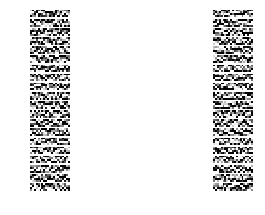

In [30]:
visualize_filter(model)